In [1]:
# Set warnings to "ignore" to keep the notebook clean
import warnings
warnings.filterwarnings("ignore")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
import jinja2
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
import os

# import semi-cleaned data
df_cor = pd.read_csv("../3. Cleaned Data/MDNtoEN_no_par.csv")

[nltk_data] Downloading package punkt to /home/timlinux/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/timlinux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_cor.head(50)

,original,corrected,original_par,corrected_par
0,There is a big difference between the east and...,There is a big difference between the east and...,NaN,NaN
1,countless beating from their parent is believe...,Countless beatings from their parent is believ...,NaN,NaN
2,May be our parent would never realize the trau...,Maybe our parents would never realize the trau...,NaN,NaN
3,how successful was the league of nations in es...,How successful was the League of Nations in es...,NaN,NaN
4,The league of nations is an organization form ...,The League of Nations was an organization form...,NaN,NaN
5,The league was successful in establishing peac...,The League was successful in establishing peac...,NaN,NaN
6,The league was successful in establishing peac...,whom they employed to kill mosquitos to preven...,NaN,NaN
7,As three of the most powerful nations in the w...,Three of the most powerful nations in the worl...,NaN,NaN
8,"russia and united state,the two most powerful ...",Russia and the United States. The two most pow...,NaN,NaN
9,however they are unsuccessful because most of ...,However the League was unsuccessful because it...,NaN,NaN


In [4]:
import re

df_cor= df_cor[df_cor[["original", "corrected"]].applymap(lambda x: isinstance(x, str)).all(axis=1)]

df_cor["original"] = df_cor["original"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)
df_cor["corrected"] = df_cor["corrected"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)

df_cor['word_count_original']=df_cor['original'].apply(lambda x:len(x.split()))
df_cor['word_count_corrected']=df_cor['corrected'].apply(lambda x:len(x.split()))

In [5]:
df_cor.shape

(100147, 6)

In [6]:
df_cor[df_cor['word_count_corrected']/df_cor['word_count_original']>=2].count()

original                3835
corrected               3835
original_par               0
corrected_par              0
word_count_original     3835
word_count_corrected    3835
dtype: int64

In [7]:
df_cor['corrected'][5]

'The League was successful in establishing peace during the 1920s by discouraging aggression towards other countries through negotiation. The League also planned to provide collective security through a community of power, for example in the case of Silesia, where the League settled a dispute between Germany and Poland through a plebiscite. Another example is the Aaland Islands, where after an investigation the League managed to settle a dispute between Sweden and Finland. The League was also successful in improving living standards. For example they provided direct aid and welfare to people in need around the world. One of their famous acts is the repatriation of 400,000 WWI prisoners, whom they employed them to kill mosquitos to prevent malaria and also to prevent leprosy. They also provided economic experts to help Austria and Hungary, as well as establishing the International Labour Organization.'

In [8]:
df_cor[df_cor['word_count_corrected']/df_cor['word_count_original']>=2].head(50) #.style.set_properties(subset=['original','corrected'], **{'width': '400px'})

,original,corrected,original_par,corrected_par,word_count_original,word_count_corrected
45,i mad at it.,I'm so mad about it. or It makes me so mad.,NaN,NaN,4,11
54,"700,I get up on the o'clock.",",I get up at 7 o'clock, on the dot. 'on the do...",NaN,NaN,6,20
55,I'm in the school's lake read English very lou...,I'm in the school's lake read English very lou...,NaN,NaN,10,32
200,by school bus and by the school bus Which p...,by school bus and by the school bus Which p...,NaN,NaN,12,54
233,My toes have freezing lump .,My toes have freezing lump . Do you mean 'my t...,NaN,NaN,6,22
238,This year it is so strange.,This year it is so strange. This year has been...,NaN,NaN,6,12
241,"If they haven't met the idea one,they will jus...","If they haven't met the ideal one,they will ju...",NaN,NaN,14,38
250,I found a beatiful one suddenly.,Suddenly I found a beautiful pair of pants tha...,NaN,NaN,6,15
294,The turmoil in Ivory Coast,The Turmoil in the Ivory Coast Titles The firs...,NaN,NaN,5,58
314,But it was fine yesterday.,But it was fine yesterday. Better way The weat...,NaN,NaN,5,17


In [9]:
# create the new columns 'word_count_diff' to calculate the number of word count difference between corrected and original sentences
df_cor['word_count_diff']=df_cor['word_count_corrected']-df_cor['word_count_original']

# create the new columns 'word_count_ratio' to calculate the ratio of word count between corrected and original sentences
df_cor['word_count_ratio']=df_cor['word_count_corrected']/df_cor['word_count_original']

In [10]:
df_cor.describe()

,original_par,corrected_par,word_count_original,word_count_corrected,word_count_diff,word_count_ratio
count,0.0,0.0,100147.000000,100147.000000,100147.000000,1.001470e+05
mean,NaN,NaN,13.801851,15.156370,1.354519,inf
std,NaN,NaN,8.202286,9.758561,5.297494,NaN
min,NaN,NaN,0.000000,1.000000,-114.000000,7.317073e-02
25%,NaN,NaN,8.000000,9.000000,0.000000,1.000000e+00
50%,NaN,NaN,12.000000,13.000000,0.000000,1.000000e+00
75%,NaN,NaN,17.000000,19.000000,2.000000,1.142857e+00
max,NaN,NaN,140.000000,266.000000,255.000000,inf


In [11]:
# display the last 30 rows where word count ratio is higher than 1.25 and lower than 1.5
df_cor[(df_cor['word_count_ratio']>1.25)&(df_cor['word_count_ratio']<1.5)].tail(30).style.set_properties(subset=['original'], **{'width': '400px'})

,original,corrected,original_par,corrected_par,word_count_original,word_count_corrected,word_count_diff,word_count_ratio
99618,"It's great!The one have an healthy body,will in a good mood to do everything.","It's great! If you have an healthy body, you will be in a good mood to do anything.",nan,nan,14,18,4,1.285714
99623,"We have intened learn from the end of June,but we take times to anther friend's home and then gone home,so we begun later finally.","We had decided to learn at the end of June,but we took so much time arguing in another friend's home and then went home without any agreement,so only option left for us was 20th July.",nan,nan,24,35,11,1.458333
99641,"Taxi was warm, I love taxi","The taxi was warm, I love the taxi",nan,nan,6,8,2,1.333333
99662,"Lang-8 ate my diary?maybe something wrong with my operation, faint!!!",Lang-8 ate my diary? Maybe something is wrong with my equipment. I could faint!!!,nan,nan,10,14,4,1.400000
99668,"When i was junior high school,i had begun learning English.",I have been learning English ever since I was in junior high school.,nan,nan,10,13,3,1.300000
99680,I hope that my acne better soon.,I hope I can get over my pimple problem soon.,nan,nan,7,10,3,1.428571
99691,"In fact, this is a professor of FuDan university class.","In fact, it was a university lecture given by a professorfrom FuDan university.",nan,nan,10,13,3,1.300000
99728,People's physical and mental life are full satisfied by various things.,The physical and mental life of people are satisfied fully by a variety of things.,nan,nan,11,15,4,1.363636
99765,"module,one that has tormented me for long.","module, one thatwhich has tormented me for longa long time.",nan,nan,7,10,3,1.428571
99774,it is my first time write diary.,it is my first time writing a diary entry.,nan,nan,7,9,2,1.285714


In [12]:
# filter the rows where word count ratio is more than 0.75 and less than 1.5
df_cor_filtered=df_cor[(df_cor['word_count_ratio']<1.5)&(df_cor['word_count_ratio']>0.75)]

In [13]:
df_cor_filtered.shape

(90749, 8)

<Axes: xlabel='word_count_diff', ylabel='Count'>

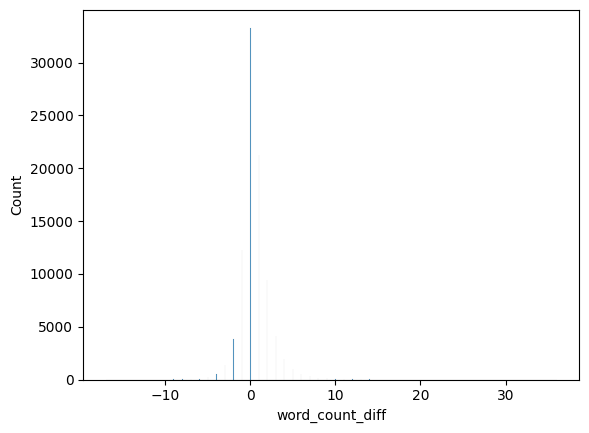

In [14]:
sns.histplot(data=df_cor_filtered,x='word_count_diff')

<Axes: xlabel='word_count_ratio', ylabel='Count'>

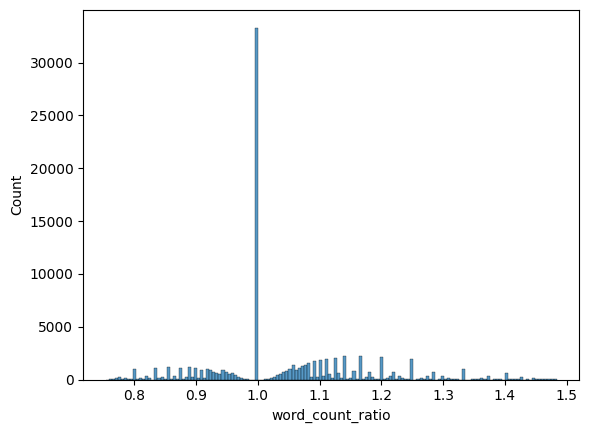

In [15]:
sns.histplot(data=df_cor_filtered,x='word_count_ratio')

In [16]:
# save csv file
df_cor_filtered.to_csv('../3. Cleaned Data/MDNtoEN_clean_full.csv')